In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_excel("../materials/Studenciaki.xlsx")

# Overall info, removing unnasesery columns, renaming columns to fit what we had befor


In [32]:
print(df.columns)
print(df.shape)


Index(['Biopsja z >1 zmiany? (systematic grupa)', 'DATA URODZENIA', 'WIEK',
       'Prostatektomia w szpitalu?', 'PSA', 'PSAdensity', 'Prost vol, w MRI',
       'bx w szpitalu', 'DRE  0-prawidłowe 1-patologiczne',
       'bx (0 - biopsja pierwszy raz, 1 biopsja kolejna)',
       ...
       'Najwyższy ISUP z biopsji wszystkich', 'Wycinki + (REG)',
       'Wszystki Wycinki (REG)', 'ISUP bx SYS',
       'ilość dodatnich wycinków(SYSPL)2', 'ilość wycinków(SYSPL)',
       'ilość dodatnich wycinków(SYSPP)2', 'ilość  wycinków(SYSPP)',
       'Ilość dodatnich wycinków SYS', 'Ilość wszystkich wycinków SYS'],
      dtype='object', length=151)
(230, 151)


In [33]:
df = df.drop(columns=["DATA URODZENIA", ])

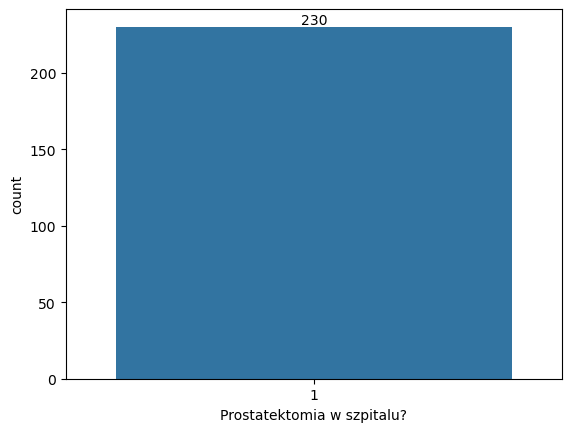

In [34]:
ax = sns.countplot(x="Prostatektomia w szpitalu?", data=df)
ax.bar_label(ax.containers[0])
plt.show()

reomve Prostektomia w szpitalu couse usuless :/

In [35]:
df.drop(columns=["Prostatektomia w szpitalu?"], inplace=True)

In [ ]:
non_null_counts = df.notnull().sum()

threshold = 200

columns_with_many_missing = non_null_counts[non_null_counts < threshold]
print(len(columns_with_many_missing))
print(columns_with_many_missing)
df.shape

<class 'pandas.core.series.Series'>
120
Biopsja z >1 zmiany? (systematic grupa)               0
bx (0 - biopsja pierwszy raz, 1 biopsja kolejna)     30
Strona EPE P/ L/ P+L                                  2
V (objętość) zmiany Index Lesion                    175
V zmiany 2                                           48
                                                   ... 
ilość wycinków(SYSPL)                                66
ilość dodatnich wycinków(SYSPP)2                     71
ilość  wycinków(SYSPP)                               68
Ilość dodatnich wycinków SYS                         88
Ilość wszystkich wycinków SYS                       107
Length: 120, dtype: int64


(230, 149)

In [45]:
df.drop(columns = columns_with_many_missing.index, inplace=True)


In [47]:
print(df.columns)
print(df.columns.shape)

Index(['WIEK', 'PSA', 'PSAdensity', 'Prost vol, w MRI', 'bx w szpitalu',
       'DRE  0-prawidłowe 1-patologiczne', 'EPE w MRI 0 nie 1 tak',
       'T na podstawie czy EPE+/-', 'V wszystkich zmian', 'Kolumna1',
       'Liczba zmian', 'PIRADS score - zmiana dominująca (IL)',
       'ISUP - biopsja celowana (CEL)', '% zajęcia wycinków (CEL)',
       'Najwyzszy isup', 'ISUP - RADYKALNA PROSTATEKTOMIA', 'pT-stage',
       'R(margines) 0-ujemny 1 dodatni', 'EPE 0-nie 1 -tak', 'Bx CEL PC',
       'BxCEL csPCa', ' CEL isPC', 'TGSB 0, TGPL 1, TG 2, SB 3, ??? 4',
       'PIRADS score - zmiana dominująca (IL)3', 'TOTAL CORES',
       'Najwyższy ISUP z REG/SYS', 'Bx Cel<BxSYS/REG',
       'Najwyższy ISUP z biopsji wszystkich', 'ISUP bx SYS'],
      dtype='object')
(29,)


Remove ISUP - biopsja celowana (CEL) since we care more about max isup


In [ ]:
df.drop(columns = ["ISUP - biopsja celowana (CEL)"])

In [58]:
# #CZYM JEST KOLUMNA1????
# df["Kolumna1"]
# ax = sns.countplot(x = "Kolumna1", data=df)
# ax.bar_label(ax.containers[0])
# plt.show()

In [ ]:
new_names = {
    "Najwyższy ISUP z biopsji" : "Bx ISUP Grade",
    "DRE 0-prawidłowe 1-patologiczne" : "DRE",
    "bx w szpitalu" : "BX",
    "EPE w MRI 0 nie 1 tak" : "MRI EPE",
    "T na podstawie czy EPE+/-" : "T EPE", # tez nie wiem co to 
    "V wszystkich zmian" : "V", #tu nie wiem co to
    "Najwyższy isup" : "Bx Isup Grade",
    "ISUP - RADYKALNA PROSTATEKTOMIA" : "RP ISUP Grade"
    
}

In [ ]:
df.rename(columns = new_names, inplace = True)

# Check for null values

In [ ]:
# TODO

Biopsja z >1 zmiany? (systematic grupa)      0
WIEK                                       230
PSA                                        230
PSAdensity                                 229
Prost vol, w MRI                           229
                                          ... 
ilość wycinków(SYSPL)                       66
ilość dodatnich wycinków(SYSPP)2            71
ilość  wycinków(SYSPP)                      68
Ilość dodatnich wycinków SYS                88
Ilość wszystkich wycinków SYS              107
Length: 149, dtype: int64

# Check outliers

In [15]:
# TODO


# Remove Duplicates

In [16]:
# TODO

# SAVE DATASET

In [ ]:
# TODO